## **INTRODUCTIONS**
MBTI is a personality  Myers Briggs Type Indicator is a personality type system that divides personalities into 16 distinct  types across 4 axis:
![](http://www.allkpop.com/upload/2020/03/content/051754/1583448868-chart.png)

Where each person will have a personality abbreviated from the combination of all 4 axis i.e. someone who is introverted, relies more on intuitions, feeling, and perceive rather than judge will be be labelled as an INFP.
The combinations of all these axis creates a more complex traits, strengths, and weaknesses.

![](https://yassinetounsi.com/storage/2021/05/MBTI-Types.jpg)

It is one of, if not the, the most popular personality test in the world. It is used in businesses, online, for fun, for research and lots more. A simple google search reveals all of the different ways the test has been used over time. It’s safe to say that this test is still very relevant in the world in terms of its use.

**==================================================================================================================================================**
**==================================================================================================================================================**

# **Data Pipeline**

In [151]:
from tqdm.notebook import tqdm
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
import regex as re
import transformers
from keras import backend as K
import plotly.express as px


data=pd.read_csv('../input/mbti-type/mbti_1.csv')
data.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [152]:
df1 = pd.read_csv('../input/quotes2/quotes_and_mbti.csv')

In [153]:
df1

,Unnamed: 0,Unnamed: 0.1,level_0,index,Column1,Column2,Column3,Href,Links,Quotes,Quote,25th,mbti
0,5,5,32,88,Aamir Khan,Film actor,"b. March 14, 1965",/author/34281-Aamir_Khan,https://www.azquotes.com/author/34281-Aamir_Khan,0,"['I have had unsuccessful films, but I learned...","A film just doesn't involve actors, a director...",INFJ
1,7,7,47,9,Aaron Eckhart,Film actor,"b. March 12, 1968",/author/4338-Aaron_Eckhart,https://www.azquotes.com/author/4338-Aaron_Eck...,0,"['I think women can be as cruel as men, and me...",Some movies get rushed out right after you mak...,ENFP
2,9,9,65,32,Aaron Paul,Actor,"b. August 27, 1979",/author/26606-Aaron_Paul,https://www.azquotes.com/author/26606-Aaron_Paul,0,"['Wait, so @ToysRUs pulled all of the Breaking...",I have 14 nieces and nephews.,ESFP
3,11,11,73,45,Aaron Sorkin,Screenwriter,"b. June 9, 1961",/author/13883-Aaron_Sorkin,https://www.azquotes.com/author/13883-Aaron_So...,0,"[""Don't ever forget that you're a citizen of t...",Education is the silver bullet. Education is e...,INTJ
4,12,12,77,51,Aaron Taylor-Johnson,Actor,"b. June 13, 1990",/author/62270-Aaron_Taylor_Johnson,https://www.azquotes.com/author/62270-Aaron_Ta...,0,"[""There are so many elements that make a good ...",Something like making the NIT would have been ...,INFJ
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1664,3913,3913,28357,48,Zoe Kazan,Film actress,"b. September 9, 1983",/author/63147-Zoe_Kazan,https://www.azquotes.com/author/63147-Zoe_Kazan,0,"[""Sometimes I feel that the people I'm writing...",I find playwriting to be incredibly difficult ...,ENFP
1665,3914,3914,28359,50,Zoe Kravitz,Actress,"b. December 1, 1988",/author/8269-Zoe_Kravitz,https://www.azquotes.com/author/8269-Zoe_Kravitz,0,"[""Beauty is when you can appreciate yourself. ...",I'm pretty much a thrift shop gal. Flea market...,ISFP
1666,3916,3916,28363,55,Zoe Saldana,Actress,"b. June 19, 1978",/author/12903-Zoe_Saldana,https://www.azquotes.com/author/12903-Zoe_Saldana,0,['Glamour is about feeling good in your own sk...,I don't understand labels. I don't need anybod...,INFJ
1667,3917,3917,28370,63,Zoey Deutch,Film actress,"b. November 10, 1994",/author/35018-Zoey_Deutch,https://www.azquotes.com/author/35018-Zoey_Deutch,0,['I think being able to really fall in love wi...,"I'm such a fan of Shailene Woodley, so I'm sup...",ENFP


In [154]:
df = df1[['Quote', 'mbti', 'Column2', 'Column3']]

In [155]:
df

,Quote,mbti,Column2,Column3
0,"['I have had unsuccessful films, but I learned...",INFJ,Film actor,"b. March 14, 1965"
1,"['I think women can be as cruel as men, and me...",ENFP,Film actor,"b. March 12, 1968"
2,"['Wait, so @ToysRUs pulled all of the Breaking...",ESFP,Actor,"b. August 27, 1979"
3,"[""Don't ever forget that you're a citizen of t...",INTJ,Screenwriter,"b. June 9, 1961"
4,"[""There are so many elements that make a good ...",INFJ,Actor,"b. June 13, 1990"
...,...,...,...,...
1664,"[""Sometimes I feel that the people I'm writing...",ENFP,Film actress,"b. September 9, 1983"
1665,"[""Beauty is when you can appreciate yourself. ...",ISFP,Actress,"b. December 1, 1988"
1666,['Glamour is about feeling good in your own sk...,INFJ,Actress,"b. June 19, 1978"
1667,['I think being able to really fall in love wi...,ENFP,Film actress,"b. November 10, 1994"


In [156]:
import torch
import pandas as pd
import re
import matplotlib.pyplot as plt


from torch.utils.data import TensorDataset

from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
!pip install transformers
from transformers import BertTokenizer
from transformers import BertForSequenceClassification

In [157]:
data_set = pd.DataFrame()

In [158]:
data_set['type'] = df['mbti']

In [159]:
data_set['posts'] = df['Quote']

In [160]:
types = np.unique(np.array(data_set['type']))
types

array(['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP',
       'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'],
      dtype=object)

In [161]:
total = data_set.groupby(['type']).count()*25
total

,posts
type,
ENFJ,3025
ENFP,5375
ENTJ,2025
ENTP,3825
ESFJ,2775
ESFP,2950
ESTJ,1225
ESTP,2400
INFJ,3075


Text(0.5, 1.0, 'Total posts for each personality type')

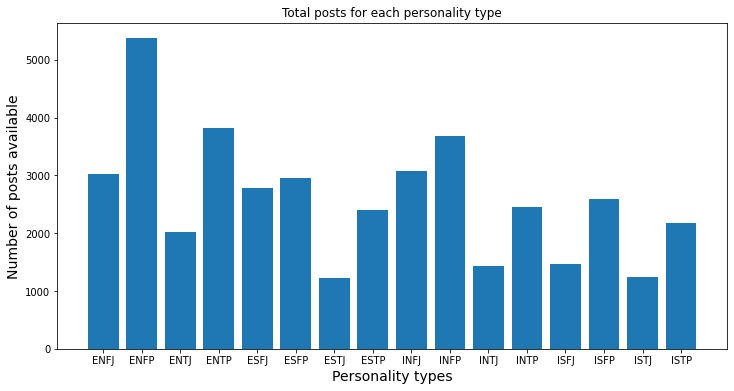

In [162]:
plt.figure(figsize = (12,6))

plt.bar(np.array(total.index), height = total['posts'],)
plt.xlabel('Personality types', size = 14)
plt.ylabel('Number of posts available', size = 14)
plt.title('Total posts for each personality type')

In [163]:
all_posts= pd.DataFrame()
for j in types:
    temp1 = data_set[data_set['type']==j]['posts']
    temp2 = []
    for i in temp1:
        temp2+=i.split('|||')
    temp3 = pd.Series(temp2)
    all_posts[j] = temp3

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import string
from nltk.classify import NaiveBayesClassifier

In [165]:
useless_words = nltk.corpus.stopwords.words("english") + list(string.punctuation)
def build_bag_of_words_features_filtered(words):
    words = nltk.word_tokenize(words)
    return {
        word:1 for word in words \
        if not word in useless_words}

In [167]:
features=[]
for j in types:
    temp1 = all_posts[j]
    temp1 = temp1.dropna() #not all the personality types have same number of files
    features += [[(build_bag_of_words_features_filtered(i), j) \
    for i in temp1]]

In [168]:
split=[]
for i in range(16):
    split += [len(features[i]) * 0.8]
split = np.array(split,dtype = int)

In [169]:
split

array([96, 96, 64, 96, 88, 94, 39, 76, 96, 96, 45, 78, 47, 83, 40, 69])

In [170]:
from nltk.classify import NaiveBayesClassifier, DecisionTreeClassifier, MaxentClassifier, SklearnClassifier

In [171]:
train=[]
for i in range(16):
    train += features[i][:split[i]] 

In [172]:
sentiment_classifier = NaiveBayesClassifier.train(train)

In [173]:
nltk.classify.util.accuracy(sentiment_classifier, train)*100

99.75062344139651

In [174]:
# Features for the bag of words model
features=[]
for j in types:
    temp1 = all_posts[j]
    temp1 = temp1.dropna() #not all the personality types have same number of files
    if('I' in j):
        features += [[(build_bag_of_words_features_filtered(i), 'introvert') \
        for i in temp1]]
    if('E' in j):
        features += [[(build_bag_of_words_features_filtered(i), 'extrovert') \
        for i in temp1]]

In [175]:
train=[]
for i in range(16):
    train += features[i][:split[i]] 

In [176]:
IntroExtro = NaiveBayesClassifier.train(train)

In [177]:
train1 = nltk.classify.util.accuracy(IntroExtro, train)*100

In [178]:
test=[]
for i in range(16):
    test += features[i][split[i]:]

In [179]:
test1 = nltk.classify.util.accuracy(IntroExtro, test)*100

In [180]:
loss1 = -nltk.classify.util.log_likelihood(IntroExtro, train)


In [181]:
# Features for the bag of words model
features=[]
for j in types:
    temp1 = all_posts[j]
    temp1 = temp1.dropna() #not all the personality types have same number of files
    if('T' in j):
        features += [[(build_bag_of_words_features_filtered(i), 'Thinking') \
        for i in temp1]]
    if('F' in j):
        features += [[(build_bag_of_words_features_filtered(i), 'Feeling') \
        for i in temp1]]

In [182]:

train=[]
for i in range(16):
    train += features[i][:split[i]] 

In [183]:
ThinkingFeeling = NaiveBayesClassifier.train(train)

In [184]:
train2 = nltk.classify.util.accuracy(ThinkingFeeling, train)*100

In [185]:
test=[]
for i in range(16):
    test += features[i][split[i]:]

In [186]:
test2 = nltk.classify.util.accuracy(ThinkingFeeling, test)*100

In [187]:
loss2 = -nltk.classify.util.log_likelihood(ThinkingFeeling, test)

In [188]:
# Features for the bag of words model
features=[]
for j in types:
    temp1 = all_posts[j]
    temp1 = temp1.dropna() #not all the personality types have same number of files
    if('N' in j):
        features += [[(build_bag_of_words_features_filtered(i), 'Intuition') \
        for i in temp1]]
    if('E' in j):
        features += [[(build_bag_of_words_features_filtered(i), 'Sensing') \
        for i in temp1]]

In [189]:
train=[]
for i in range(16):
    train += features[i][:split[i]] 

In [190]:
IntuitionSensing = NaiveBayesClassifier.train(train)

In [191]:
train3 = nltk.classify.util.accuracy(IntuitionSensing, train)*100

In [192]:
test=[]
for i in range(16):
    test += features[i][split[i]:]

In [193]:
test3 = nltk.classify.util.accuracy(IntuitionSensing, test)*100

In [194]:
# Calculate log likelihood of the training data
loss3 = -nltk.classify.util.log_likelihood(IntuitionSensing, test)

In [195]:
# Features for the bag of words model
features=[]
for j in types:
    temp1 = all_posts[j]
    temp1 = temp1.dropna() #not all the personality types have same number of files
    if('J' in j):
        features += [[(build_bag_of_words_features_filtered(i), 'Judging') \
        for i in temp1]]
    if('P' in j):
        features += [[(build_bag_of_words_features_filtered(i), 'Percieving') \
        for i in temp1]]

In [196]:
train=[]
for i in range(16):
    train += features[i][:split[i]] 

In [197]:
JudgingPercieiving = NaiveBayesClassifier.train(train)

In [198]:
train4 = nltk.classify.util.accuracy(JudgingPercieiving, train)*100

In [199]:
test=[]
for i in range(16):
    test += features[i][split[i]:]

In [200]:
test4 = nltk.classify.util.accuracy(JudgingPercieiving, test)*100

In [201]:
loss4 = -nltk.classify.util.log_likelihood(JudgingPercieiving, test)

In [202]:
temp = {'loss' : [loss1, loss3, loss2, loss4], 'accuracy' : [test1, test3, test2, test4]}
results = pd.DataFrame.from_dict(temp, orient='index', columns=['Introvert - Extrovert', 'Intuition - Sensing', 'Thinking - Feeling', 'Judging - Percieiving'])
results

,Introvert - Extrovert,Intuition - Sensing,Thinking - Feeling,Judging - Percieiving
loss,0.000227,0.598688,0.439297,0.643488
accuracy,57.692308,54.831933,65.384615,52.243590


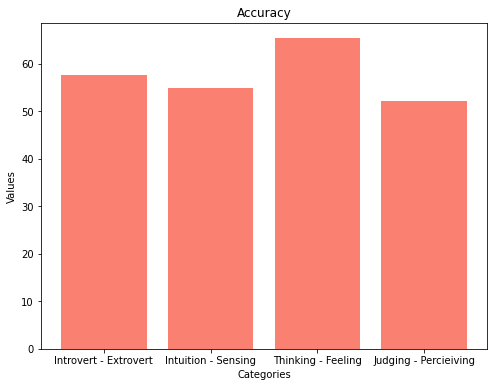

In [203]:


# Biểu đồ cột cho accuracy
plt.figure(figsize=(8, 6))
plt.bar(results.columns, results.loc['accuracy'], color='salmon')
plt.title('Accuracy')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.show()

In [204]:
user = pd.read_csv('../input/userprofile/user.csv')

In [205]:
user

,Unnamed: 0,Column1,Column2,Column3,Href
0,0,'Abd Allah ibn 'Amr ibn al-'As,Author,d. 683,/author/39301-Abd_Allah_ibn_Amr_ibn_al_As
1,1,'Amr ibn al-'As,Military Officer,"February 14, 585 - 664",/author/30551-Amr_ibn_al_As
2,2,A Fine Frenzy,Singer-songwriter,"b. December 23, 1984",/author/43495-A_Fine_Frenzy
3,3,A-Trak,DJ,"b. March 30, 1982",/author/91513-A_Trak
4,4,A. A. Allen,NaN,"March 27, 1911 - June 11, 1970",/author/37760-A_A_Allen
...,...,...,...,...,...
55810,92,Zuzana Licko,Graphic Designer,b. 1961,/author/40525-Zuzana_Licko
55811,93,Zweli Mkhize,South African legislator,"b. February 2, 1956",/author/50506-Zweli_Mkhize
55812,94,Zygmunt Bauman,Sociologist,"November 19, 1925 - January 9, 2017",/author/1054-Zygmunt_Bauman
55813,95,ZZ Packer,Author,"b. January 12, 1973",/author/61457-ZZ_Packer


In [206]:
user['Links'] = "https://www.azquotes.com" + user['Href']

In [207]:
import requests
from bs4 import BeautifulSoup

In [208]:
def get_paragraph_texts(url):
    try:
        # Gửi yêu cầu GET đến trang web
        response = requests.get(url)

        # Kiểm tra xem yêu cầu có thành công hay không
        if response.status_code == 200:
            # Sử dụng BeautifulSoup để phân tích cú pháp HTML
            soup = BeautifulSoup(response.text, 'html.parser')

            # Tìm tất cả các thẻ <p> trong trang web
            all_paragraphs = soup.find_all('p')

            # Tạo danh sách chứa nội dung của các thẻ <p>
            paragraph_texts = [paragraph.text.strip() for paragraph in all_paragraphs]
            return paragraph_texts[:-6]
        else:
            print('Yêu cầu không thành công. Mã trạng thái:', response.status_code)
            return 0
    except Exception as e:
        print('Có lỗi xảy ra:', str(e))
        return 0

In [209]:
def MBTI(input):
    df3 = user[user['Column1'] == input]
    if len(df3) == 0:
        final_result = "Person not found"
    else:
        links = df3['Links'].values
        jobs = df3['Column2'].values
        final_result = []
        for i in range(len(df3)):
            input2 = get_paragraph_texts(links[i])
            input3 = jobs[i]
            input4 = links[i]
            if input2 == 0:
                final_result = "Person not found"
            else:
                tokenize = build_bag_of_words_features_filtered(str(input2))
                ie = IntroExtro.classify(tokenize)
                Is = IntuitionSensing.classify(tokenize)
                tf = ThinkingFeeling.classify(tokenize)
                jp = JudgingPercieiving.classify(tokenize)

                mbt = ''

                if(ie == 'introvert'):
                    mbt+='I'
                if(ie == 'extrovert'):
                    mbt+='E'
                if(Is == 'Intuition'):
                    mbt+='N'
                if(Is == 'Sensing'):
                    mbt+='S'
                if(tf == 'Thinking'):
                    mbt+='T'
                if(tf == 'Feeling'):
                    mbt+='F'
                if(jp == 'Judging'):
                    mbt+='J'
                if(jp == 'Percieving'):
                    mbt+='P'
                result = str(input) + " - " + str(input3) + " - " + str(input4) + ": " + str(mbt)
                final_result.append(result)
    return final_result
    

In [215]:
def MBTI_from_quotes(input):
    tokenize = build_bag_of_words_features_filtered(str(input))
    ie = IntroExtro.classify(tokenize)
    Is = IntuitionSensing.classify(tokenize)
    tf = ThinkingFeeling.classify(tokenize)
    jp = JudgingPercieiving.classify(tokenize)

    mbt = ''

    if(ie == 'introvert'):
        mbt+='I'
    if(ie == 'extrovert'):
        mbt+='E'
    if(Is == 'Intuition'):
        mbt+='N'
    if(Is == 'Sensing'):
        mbt+='S'
    if(tf == 'Thinking'):
        mbt+='T'
    if(tf == 'Feeling'):
        mbt+='F'
    if(jp == 'Judging'):
        mbt+='J'
    if(jp == 'Percieving'):
        mbt+='P'
    return mbt
    

In [212]:
MBTI("Lionel Messi")

['Lionel Messi - Soccer player - https://www.azquotes.com/author/10009-Lionel_Messi: ISFP']

In [223]:
MBTI_from_quotes("You is very excellent")

'ESFP'